In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
classes = ['person',
'bicycle',
'car',
'motorbike',
'aeroplane',
'bus',
'train',
'truck',
'boat',
'traffic light',
'fire hydrant',
'stop sign',
'parking meter',
'bench',
'bird',
'cat',
'dog',
'horse',
'sheep',
'cow',
'elephant',
'bear',
'zebra',
'giraffe',
'backpack',
'umbrella',
'handbag',
'tie',
'suitcase',
'frisbee',
'skis',
'snowboard',
'sports ball',
'kite',
'baseball bat',
'baseball glove',
'skateboard',
'surfboard',
'tennis racket',
'bottle',
'wine glass',
'cup',
'fork',
'knife',
'spoon',
'bowl',
'banana',
'apple',
'sandwich',
'orange',
'broccoli',
'carrot',
'hot dog',
'pizza',
'donut',
'cake',
'chair',
'sofa',
'pottedplant',
'bed',
'diningtable',
'toilet',
'tvmonitor',
'laptop',
'mouse',
'remote',
'keyboard',
'cell phone',
'microwave',
'oven',
'toaster',
'sink',
'refrigerator',
'book',
'clock',
'vase',
'scissors',
'teddy bear',
'hair drier',
'toothbrush',
]

In [3]:
frozen_model = 'frozen_inference_graph.pb'
configuration_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, configuration_file)

In [5]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000224C2BE44D0>

In [6]:
image = cv2.imread('traffic_sign_img.jpg')

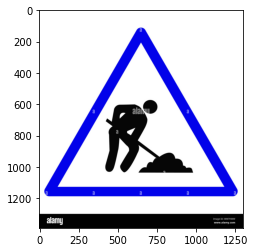

In [7]:
plt.imshow(image)

In [8]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

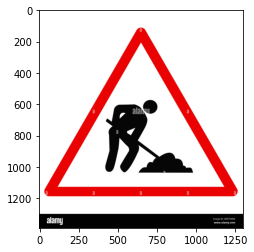

In [9]:
plt.imshow(image2)

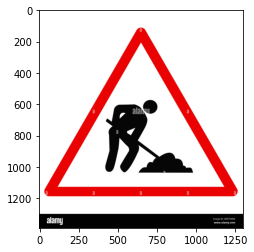

In [10]:
plt.imshow(image2)

In [11]:
ClassIndex, confidence, bbox = model.detect(image2, confThreshold = 0.4)

In [12]:
print('class_index is',ClassIndex, 'confidence is',confidence, 'boxing is', bbox)
print(ClassIndex)

class_index is [10] confidence is [0.41673824] boxing is [[425 616 280 414]]
[10]


In [13]:
car = cv2.imread('car.jpg')

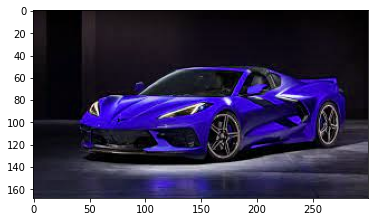

In [14]:
plt.imshow(car)

In [15]:
car2 = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

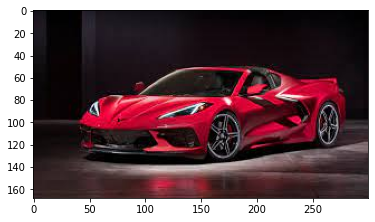

In [16]:
plt.imshow(car2)

In [17]:
ClassIndex, confidence, box = model.detect(car2, confThreshold = 0.4)

In [18]:
print(ClassIndex, ' ', confidence, ' ', box)

[3]   [0.7957307]   [[ 44  46 241  91]]


In [25]:
videoCapturing = cv2.VideoCapture(1) 
if not videoCapturing.isOpened() :
    videoCapturing = cv2.VideoCapture(0)
# if still not opened then raise error
if not videoCapturing.isOpened() :    
    raise IOError('Cannot Open Webcam')
    
font_scale = 2
font = cv2.FONT_HERSHEY_TRIPLEX

while True :
    ret, frame = videoCapturing.read()
    ClassIndex, confidence, box = model.detect(frame, confThreshold = 0.5)
    
    if len(ClassIndex) != 0 :
        for class_index , confid , box2 in zip(ClassIndex.flatten(), confidence.flatten(), box) :
            if(class_index < 81) :
                cv2.rectangle(frame, box2, (255, 125, 0), 1)
                cv2.putText(frame, classes[class_index-1], (box2[0]+10, box2[1]+40), font, fontScale = font_scale, color = (200,120,50))

    cv2.imshow('Frame', frame) 
    
    if cv2.waitKey(1) & 0xFF == ord('q') :
        break
        
videoCapturing.release()
cv2.destroyAllWindows()